In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import math
%matplotlib inline

$\xi \sim Pois(\lambda) \implies E\xi = \lambda$

$N_t - N_s \sim Pois(\lambda(t-s))$ и $(N_t - N_s) \bot N_s $ 

$E(N_t|N_s) = E(N_t - N_s|N_s) + E(N_s|N_s) = E(N_t - N_s) + N_s = \lambda(t-s) + N_s$

$t_0 = 1, t = 60$.

In [10]:
file_name = '7.4_data.txt'
file = open(file_name , 'r')
data = list(map(float, file.readlines()))
file.close()
lmb_0 = data[0] # \lambda_0 = 0.335
failed_time = data[1:]
t = 60

Сопряженное для экспоненциального распределения - гамма распределение $\Gamma(\alpha ,\frac{1}{\beta})$

Выберем $\alpha = 1$ , считая что $\lambda$ все же не очень велико

$\beta = 0.5$, чтобы даже в случае большого $\lambda$ получать хорошую оценку (график плотности достаточно плавный и пологий)

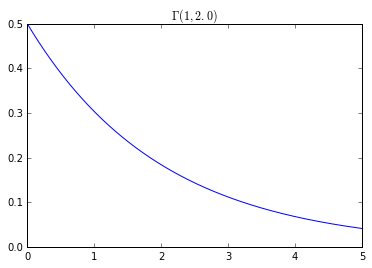

In [79]:
a_prm = 1
b_prm = 0.5
OX = np.arange(0,5,0.001)
plt.plot(OX,sps.gamma.pdf(OX,a_prm,scale = 1/b_prm))
plt.title(r'$\Gamma(' + str(a_prm) + ' , ' + str(round(1/b_prm,2)) + ')$')
plt.show()

$ \xi \sim \Gamma(\alpha,\frac{1}{\beta}) , E\xi = \frac{\alpha}{\beta}$

Параметры апостериорного распределения : $\alpha = \alpha_0 + n$ , $\beta = \beta_0 + \Sigma x_i$

In [80]:
def get_gamma_bayes_evl(X = []) :
    a1 = a_prm + len(X)
    b1 = b_prm + np.sum(X)
    return a1 / b1

In [81]:
NS = [len([0 for time in failed_time if time <= s]) for s in range(t+1)]
ksi = [failed_time[i+1] - failed_time[i] for i in range(1,len(failed_time)-1)]
print("t||E(N_t|N_s)")
print("__________")
k = 0
lmb_evl = []
for s in range(t + 1) :
    while k < len(failed_time) and failed_time[k] < s:
        k = k + 1
    lmb = 0
    if k > 1 :
        lmb = get_gamma_bayes_evl(ksi[0:k-2])
    else :
        lmb = get_gamma_bayes_evl()
    
    lmb_evl.append(abs(lmb_0 - lmb))
    exp = lmb*(t - s) + NS[s]
    print("%d||%.3f" % (s , exp))

t||E(N_t|N_s)
__________
0||120.000
1||120.000
2||118.000
3||63.286
4||62.228
5||61.170
6||38.571
7||41.012
8||40.332
9||39.653
10||34.422
11||33.854
12||32.781
13||32.244
14||31.707
15||31.170
16||30.633
17||26.689
18||28.299
19||30.608
20||30.105
21||29.602
22||29.100
23||27.837
24||29.156
25||28.680
26||28.203
27||27.727
28||27.250
29||26.428
30||25.995
31||25.561
32||25.128
33||24.695
34||24.262
35||23.829
36||23.396
37||22.329
38||23.318
39||24.327
40||23.930
41||23.534
42||23.137
43||22.741
44||24.310
45||23.915
46||23.521
47||24.096
48||23.704
49||23.312
50||22.920
51||23.379
52||24.133
53||24.837
54||26.592
55||26.160
56||27.754
57||27.347
58||26.898
59||26.449
60||27.000


При достаточно больших $n$ ($n \geq 20$) становится возможным достаточно точно оценить $\lambda$,
и результат работы программы-предсказателя не сильно отличается от результата, получаемого при известном $\lambda$.

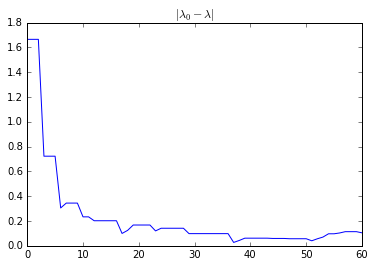

In [94]:
plt.plot(np.arange(0,61,1), lmb_evl)
plt.xlim(0,60)
plt.title(r'$|\lambda_0 - \lambda|$')
plt.show()